In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
import statsmodels
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('C:/Users/Adyasha/Downloads/linear_assignment_upgrad/day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
data.shape

(730, 16)

In [4]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
data.cnt.describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

# Visaulising the Data

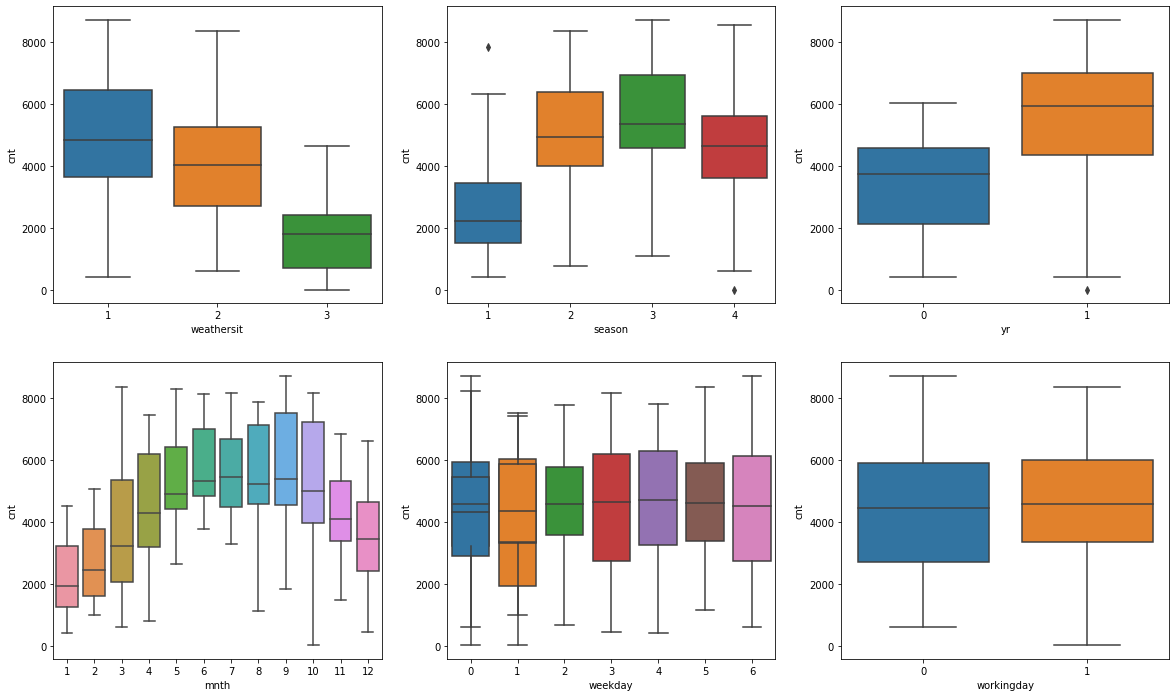

In [6]:
#boxplot
plt.figure(figsize=[20,12])
plt.subplot(2,3,1)
sns.boxplot(x='weathersit', y='cnt', data=data)
plt.subplot(2,3,2)
sns.boxplot(x='season', y='cnt', data=data)
plt.subplot(2,3,3)
sns.boxplot(x='yr', y='cnt', data=data)
plt.subplot(2,3,4)
sns.boxplot(x='mnth', y='cnt', data=data)
plt.subplot(2,3,5)
sns.boxplot(x='holiday', y='cnt', data=data)
plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='cnt', data=data)
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=data)

# Checking the outliers

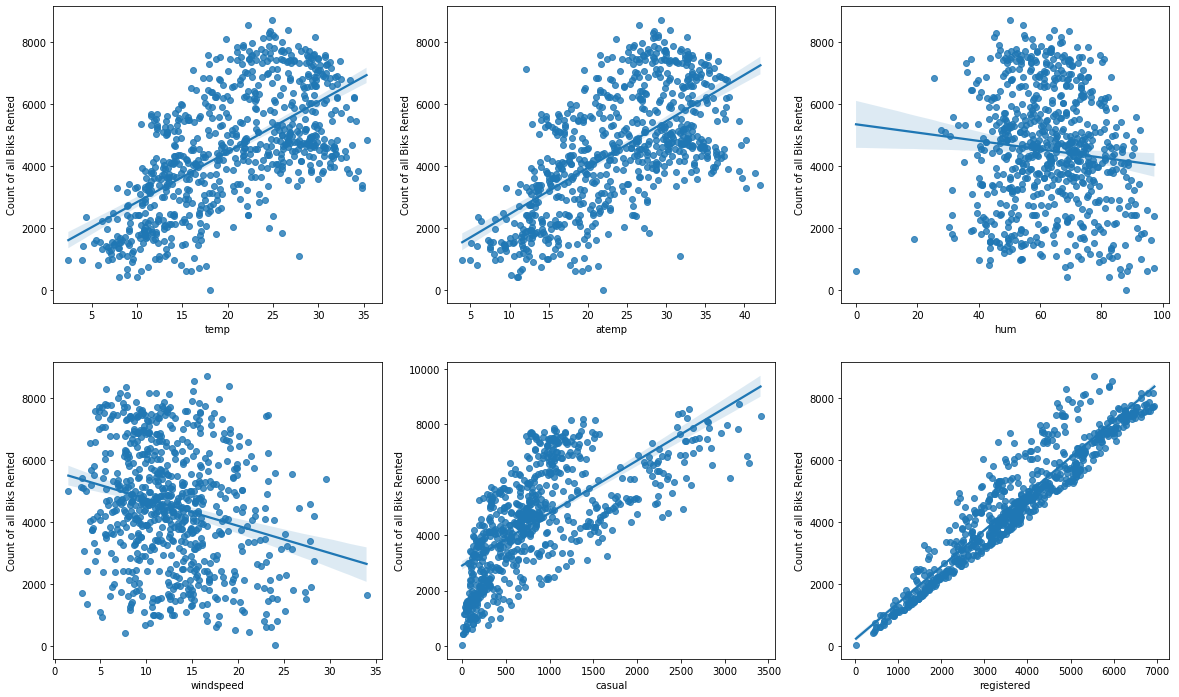

In [7]:
plt.figure(figsize=[20,12])
plt.subplot(2,3,1)
sns.regplot(x=data['temp'], y=data['cnt'], data=data)
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

plt.subplot(2,3,2)
sns.regplot(x=data['atemp'], y=data['cnt'], data=data)
plt.xlabel('atemp')
plt.ylabel('Count of all Biks Rented')

plt.subplot(2,3,3)
sns.regplot(x=data['hum'], y=data['cnt'], data=data)
plt.xlabel('hum')
plt.ylabel('Count of all Biks Rented')

plt.subplot(2,3,4)
sns.regplot(x=data['windspeed'], y=data['cnt'], data=data)
plt.xlabel('windspeed')
plt.ylabel('Count of all Biks Rented')

plt.subplot(2,3,5)
sns.regplot(x=data['casual'], y=data['cnt'], data=data)
plt.xlabel('casual')
plt.ylabel('Count of all Biks Rented')

plt.subplot(2,3,6)
sns.regplot(x=data['registered'], y=data['cnt'], data=data)
plt.xlabel('registered')
plt.ylabel('Count of all Biks Rented')
plt.show()

1 - As per the above plotting we can see there is a liner relation between number of bike rented and temperature the 
    warmmer the temp the more bike get rented.
    
2 - In the plotting temp and atemp is very similar distributions and outliers so, we can drop the atemp.

3 - Hum(humidity) and windspeed indicates large outliers.

In [8]:
months={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
data['mnth']=data['mnth'].map(months)

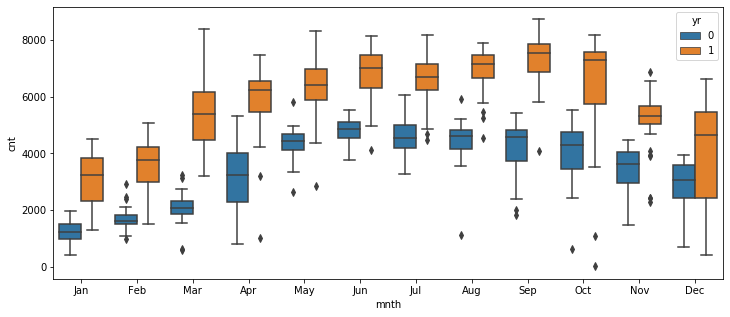

In [9]:
plt.figure(figsize = (12, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'yr', data = data)
plt.show()

# Comparing "bike rented" with "wethersit" and "seasons"

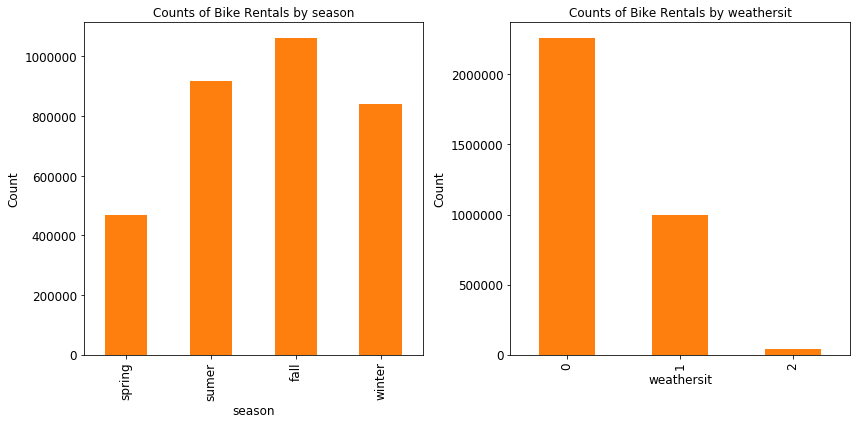

In [10]:
f, (ax1, ax2)=plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax1 = data[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by season", 
                                         stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("season", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['spring','sumer','fall','winter'])

 
ax2 = data[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="Counts of Bike Rentals by weathersit", fontsize=12, ax=ax2)

ax2.set_xlabel("weathersit", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

f.tight_layout()

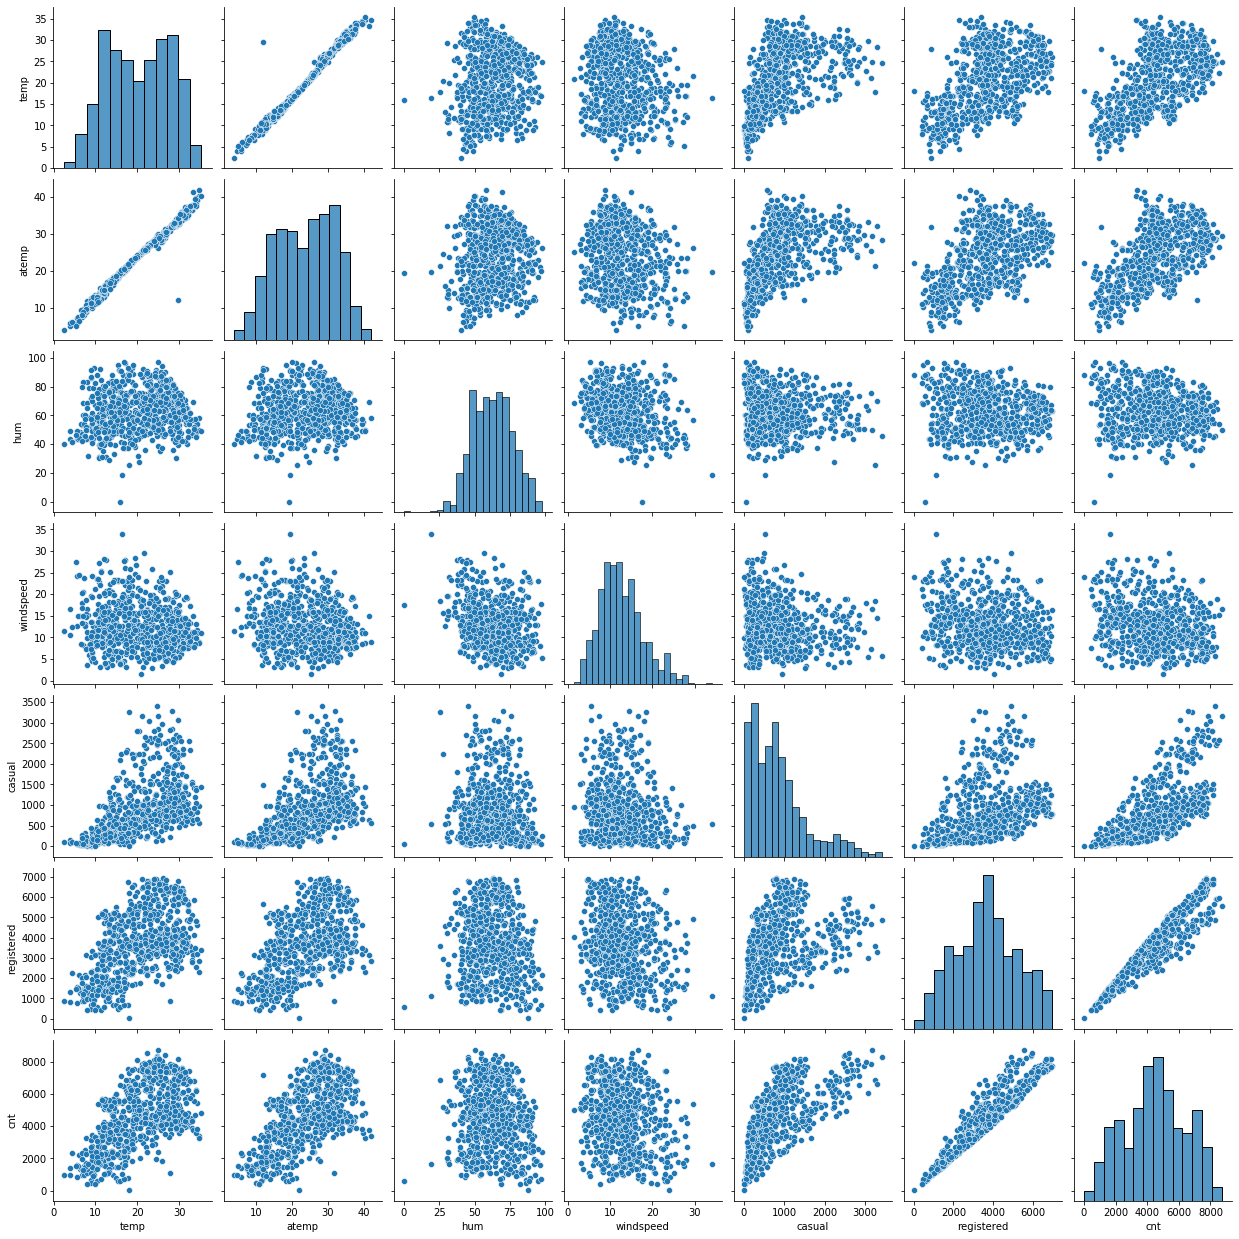

In [11]:
#pair plot for numerical varirables 
x=data[[ 'temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']]
sns.pairplot(x)
plt.show()

Above pair-plot among the numerical variables indicatesthat "temp" and "atemp"  has the highest correlation
with the target variable

In [12]:
weekdays={0:'Mon', 1:'Tues', 2:'Wed', 3:'Thr', 4:'Fri', 5:'Sat', 6:'Sun'}
data['weekday'] = data['weekday'].map(weekdays)

seasons={1:'spring', 2:'summer', 3:'fall', 4:'winter'}
data['season'] = data['season'].map(seasons)

weather={1:'Clear', 2:'Mist', 3:'Light snow', 4:'Heavy rain'}
data['weathersit'] = data['weathersit'].map(weather)

In [13]:
#droping casual and registered columns as target column is the sum of both
data = data.drop(['casual', 'registered', 'instant', 'dteday'], axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sun,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Mon,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Tues,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Thr,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# Converting Object columns to DUMMY Variables
data_categorical = data.select_dtypes(include=['object'])

data_dummies = pd.get_dummies(data_categorical,dtype=int,drop_first=True)
data = pd.concat([data, data_dummies], axis=1)

data = data.drop(['season', 'weathersit', 'mnth', 'weekday'], axis=1)
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tues,weekday_Wed,weathersit_Light snow,weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,1,0,0,0,0


In [15]:
df_train, df_test= train_test_split(data, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [16]:
# 1. Instantiate an object
scaler=MinMaxScaler()

#create alist of numeric vars
#temp and atemp have most similar values so we take only temp here

num_vars=['temp', 'hum', 'windspeed', 'cnt']

# 2.Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train[num_vars].head()

,temp,hum,windspeed,cnt
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096
482,0.395666,0.504508,0.188475,0.482973
111,0.345824,0.751824,0.380981,0.191095


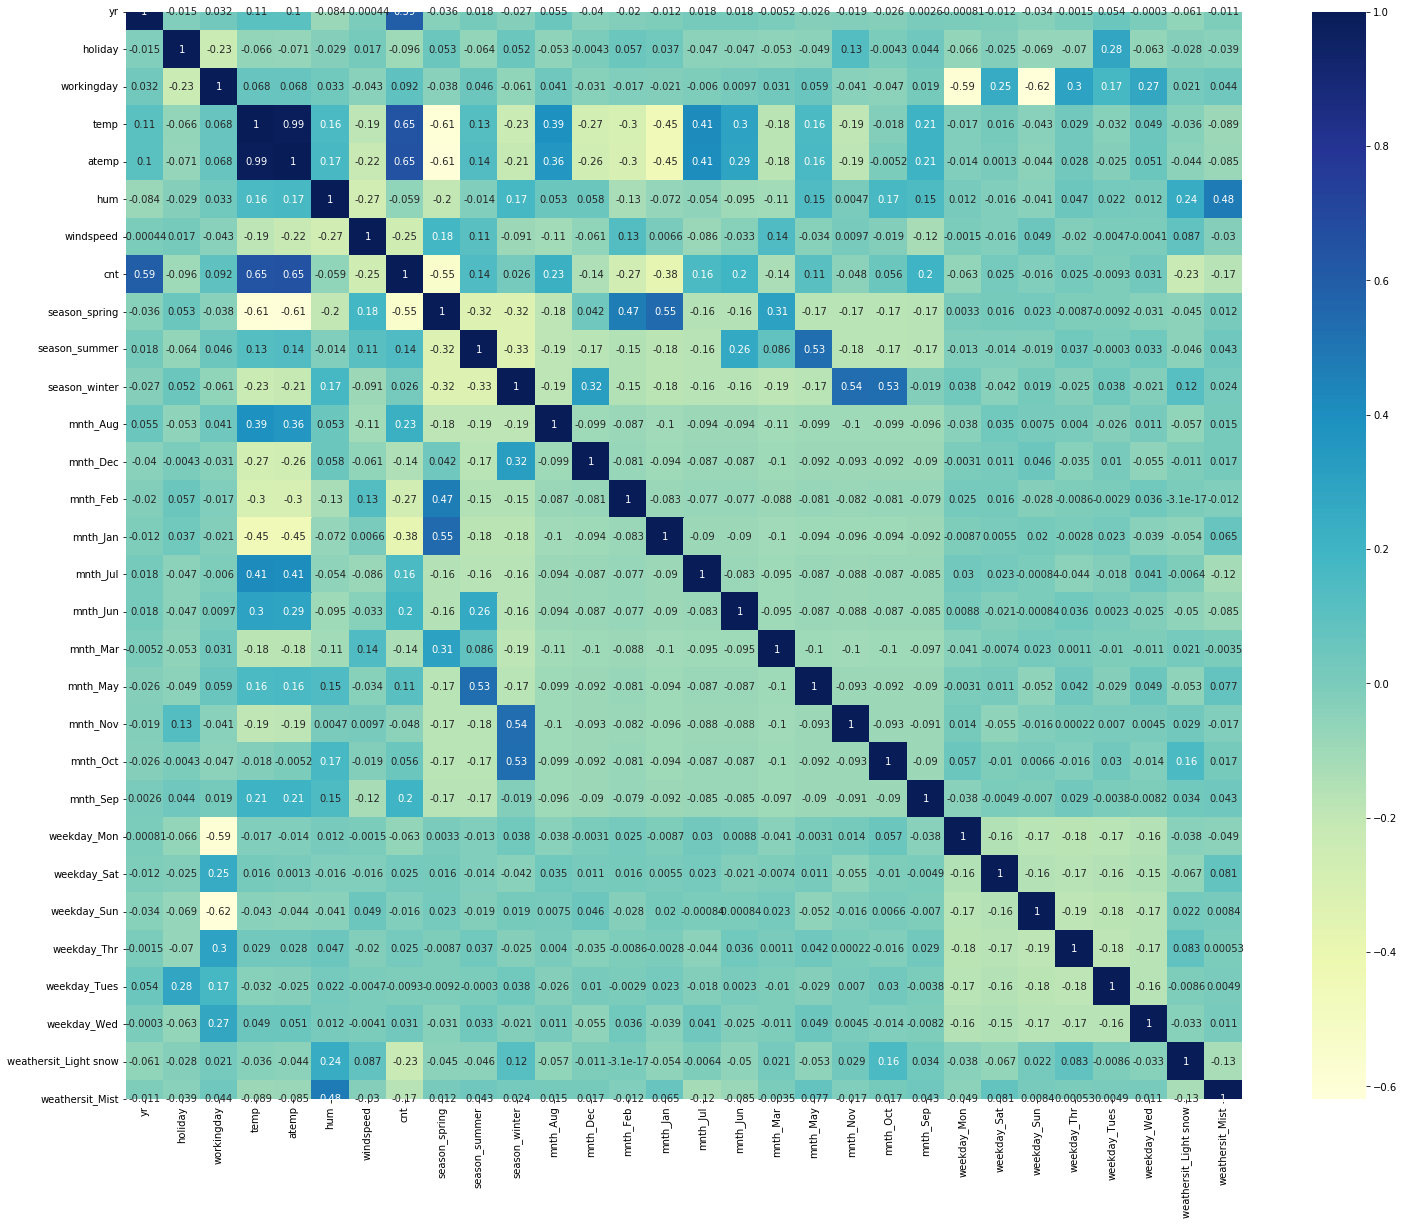

In [17]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [18]:
#X_train, y_train
y_train=df_train.pop("cnt")
X_train=df_train

In [19]:
#add a constant
X_train_sm= sm.add_constant(X_train['temp'])

#create first model
lr= sm.OLS(y_train, X_train_sm.astype(float))

#fit
lr_model=lr.fit()

#params
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [20]:
#build a variables with all variables 
X_train_sm=sm.add_constant(X_train)

#create model
lr= sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.81e-180
Time:                        23:51:52   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2345      0.037      6.293      0.000       0.161       0.308
yr                        0.2325      0.008     28.794      0.000       0.217       0.248
holiday                   0.0038      0.024      0.159      0.874      -0.043       0.051
workingday                0.0892      0.013      6.932      0.000       0.064       0.114
temp                      0.3880      0.142      2.727      0.007       0.108       0.668
atemp                     0.0016      0.004      0.426      0.670      -0.006       0.009
hum                      -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed                -0.1836      0.026     -6.962      0.000      -0.235      -0.132
season_spring            -0.0454      0.030     -1.511      0.131      -0.104       0.014
season_summer             0.0424      0.026      1.617      0.107      -0.009       0.094
season_winter             0.1071      0.028      3.826      0.000       0.052       0.162
mnth_Aug                  0.0223      0.034      0.657      0.511      -0.044       0.089
mnth_Dec                 -0.0443      0.034     -1.316      0.189      -0.110       0.022
mnth_Feb                 -0.0323      0.033     -0.980      0.327      -0.097       0.032
mnth_Jan                 -0.0631      0.034     -1.876      0.061      -0.129       0.003
mnth_Jul                 -0.0327      0.035     -0.931      0.352      -0.102       0.036
mnth_Jun                  0.0060      0.025      0.241      0.810      -0.043       0.055
mnth_Mar                  0.0016      0.025      0.063      0.950      -0.047       0.050
mnth_May                  0.0255      0.021      1.208      0.228      -0.016       0.067
mnth_Nov                 -0.0398      0.036     -1.093      0.275      -0.111       0.032
mnth_Oct                  0.0077      0.036      0.215      0.830      -0.063       0.078
mnth_Sep                  0.0868      0.032      2.711      0.007       0.024       0.150
weekday_Mon               0.0436      0.014      3.071      0.002       0.016       0.072
weekday_Sat               0.0097      0.016      0.623      0.534      -0.021       0.040
weekday_Sun               0.0978      0.014      6.996      0.000       0.070       0.125
weekday_Thr               0.0038      0.015      0.261      0.794      -0.025       0.033
weekday_Tues             -0.0119      0.015     -0.785      0.433      -0.042       0.018
weekday_Wed              -0.0087      0.015     -0.564      0.573      -0.039       0.022
weathersit_Light snow    -0.2550      0.026     -9.631      0.000      -0.307      -0.203
weathersit_Mist          -0.0595      0.010     -5.701      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       84.

# VIF

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,workingday,96.42
3,temp,66.90
4,atemp,56.03
23,weekday_Sun,21.91
21,weekday_Mon,20.38
7,season_spring,10.77
9,season_winter,9.46
8,season_summer,8.29
18,mnth_Nov,6.79
10,mnth_Aug,6.47


In [23]:
# col_list = vif[vif.VIF < 6]['Features'].tolist()

# X = X_train[[c for c in X_train.columns if c in col_list]]

#drop the  column because the value of VIF is higher than 5
X = X_train.drop(['temp', 'workingday', 'atemp'], axis=1)

In [24]:
#creating another model
X_train_sm=sm.add_constant(X)

#create model
lr= sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     87.09
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          5.37e-164
Time:                        23:51:53   Log-Likelihood:                 482.17
No. Observations:                 510   AIC:                            -910.3
Df Residuals:                     483   BIC:                            -796.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5329      0.043     12.529      0.000       0.449       0.616
yr                        0.2459      0.009     28.372      0.000       0.229       0.263
holiday                  -0.0685      0.029     -2.364      0.018      -0.125      -0.012
hum                      -0.0497      0.040     -1.229      0.220      -0.129       0.030
windspeed                -0.1782      0.028     -6.349      0.000      -0.233      -0.123
season_spring            -0.0819      0.032     -2.526      0.012      -0.146      -0.018
season_summer             0.0026      0.028      0.092      0.927      -0.053       0.058
season_winter             0.0833      0.030      2.745      0.006       0.024       0.143
mnth_Aug                  0.1088      0.035      3.091      0.002       0.040       0.178
mnth_Dec                 -0.1349      0.035     -3.830      0.000      -0.204      -0.066
mnth_Feb                 -0.1279      0.034     -3.733      0.000      -0.195      -0.061
mnth_Jan                 -0.1934      0.034     -5.768      0.000      -0.259      -0.128
mnth_Jul                  0.0828      0.036      2.318      0.021       0.013       0.153
mnth_Jun                  0.1097      0.024      4.531      0.000       0.062       0.157
mnth_Mar                 -0.0377      0.026     -1.425      0.155      -0.090       0.014
mnth_May                  0.0841      0.022      3.835      0.000       0.041       0.127
mnth_Nov                 -0.1077      0.039     -2.765      0.006      -0.184      -0.031
mnth_Oct                 -0.0046      0.039     -0.117      0.907      -0.081       0.072
mnth_Sep                  0.1284      0.034      3.725      0.000       0.061       0.196
weekday_Mon              -0.0540      0.017     -3.274      0.001      -0.086      -0.022
weekday_Sat               0.0062      0.017      0.364      0.716      -0.027       0.039
weekday_Sun               0.0022      0.016      0.137      0.891      -0.029       0.034
weekday_Thr               0.0021      0.016      0.134      0.894      -0.029       0.034
weekday_Tues             -0.0198      0.016     -1.204      0.229      -0.052       0.013
weekday_Wed              -0.0105      0.017     -0.622      0.534      -0.044       0.023
weathersit_Light snow    -0.2908      0.028    -10.206      0.000      -0.347      -0.235
weathersit_Mist          -0.0794      0.011     -7.118      0.000      -0.101      -0.057
==============================================================================
Omnibus:                       83.731   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              308.307
Skew:                          -0.705   Prob(JB):                     1.13e-67
Kurtosis:                       6.538   Cond. No.                  

In [25]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,hum,27.72
4,season_spring,11.78
6,season_winter,11.72
5,season_summer,6.69
16,mnth_Oct,6.13
15,mnth_Nov,6.02
10,mnth_Jan,4.87
3,windspeed,4.85
8,mnth_Dec,4.85
9,mnth_Feb,3.89


In [26]:
#drop another column which higher than VIF 5.
X=X.drop(["hum", "season_winter","season_spring"], axis=1)

In [27]:
#creating another model
X_train_sm=sm.add_constant(X)

#create model
lr= sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     90.77
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.63e-159
Time:                        23:51:54   Log-Likelihood:                 463.97
No. Observations:                 510   AIC:                            -879.9
Df Residuals:                     486   BIC:                            -778.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4643      0.032     14.370      0.000       0.401       0.528
yr                        0.2486      0.009     27.878      0.000       0.231       0.266
holiday                  -0.0830      0.030     -2.781      0.006      -0.142      -0.024
windspeed                -0.1890      0.028     -6.829      0.000      -0.243      -0.135
season_summer             0.0466      0.022      2.105      0.036       0.003       0.090
mnth_Aug                  0.1464      0.031      4.709      0.000       0.085       0.208
mnth_Dec                 -0.0628      0.032     -1.993      0.047      -0.125      -0.001
mnth_Feb                 -0.1648      0.032     -5.122      0.000      -0.228      -0.102
mnth_Jan                 -0.2328      0.031     -7.449      0.000      -0.294      -0.171
mnth_Jul                  0.1220      0.032      3.831      0.000       0.059       0.185
mnth_Jun                  0.1223      0.024      5.070      0.000       0.075       0.170
mnth_Mar                 -0.0628      0.026     -2.457      0.014      -0.113      -0.013
mnth_May                  0.0769      0.022      3.449      0.001       0.033       0.121
mnth_Nov                  0.0168      0.031      0.535      0.593      -0.045       0.078
mnth_Oct                  0.1158      0.032      3.665      0.000       0.054       0.178
mnth_Sep                  0.1834      0.032      5.752      0.000       0.121       0.246
weekday_Mon              -0.0548      0.017     -3.226      0.001      -0.088      -0.021
weekday_Sat               0.0076      0.018      0.435      0.664      -0.027       0.042
weekday_Sun               0.0035      0.017      0.208      0.835      -0.029       0.036
weekday_Thr               0.0018      0.017      0.110      0.912      -0.031       0.034
weekday_Tues             -0.0157      0.017     -0.924      0.356      -0.049       0.018
weekday_Wed              -0.0083      0.017     -0.476      0.635      -0.042       0.026
weathersit_Light snow    -0.3001      0.027    -11.020      0.000      -0.354      -0.247
weathersit_Mist          -0.0860      0.010     -8.936      0.000      -0.105      -0.067
==============================================================================
Omnibus:                       81.500   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.490
Skew:                          -0.744   Prob(JB):                     4.04e-55
Kurtosis:                       6.095   Cond. No.                         27.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
X.columns

Index(['yr', 'holiday', 'windspeed', 'season_summer', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thr', 'weekday_Tues', 'weekday_Wed',
       'weathersit_Light snow', 'weathersit_Mist'],
      dtype='object')

In [29]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,windspeed,4.46
3,season_summer,3.35
19,weekday_Tues,2.08
18,weekday_Thr,2.04
17,weekday_Sun,2.04
0,yr,2.01
15,weekday_Mon,1.94
20,weekday_Wed,1.87
16,weekday_Sat,1.85
13,mnth_Oct,1.83


- The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

- A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity. In our case, with values less than 5, we are in good shape, and can proceed with our regression

- R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of 0.811 or 81.1%

- The adjusted R-squared adjusts for the number of terms in the model. And we got it around 0.802 or 80.2%

# Residual Analysis

In [30]:
y_train_pred=lr_model.predict(X_train_sm)

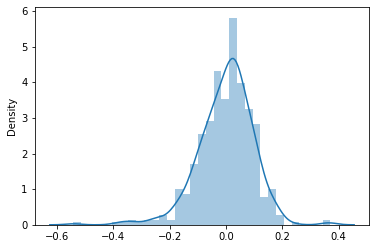

In [31]:
res=y_train-y_train_pred
sns.distplot(res)
plt.show()

We can see Error terms are normally distributed

# Evaluation

In [32]:
#create alist of numeric vars
#temp and atemp have most similar values so we take only temp here

num_vars=['temp', 'hum', 'windspeed', 'cnt']

# 2.Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
y_test=df_test.pop("cnt")
X_test=df_test


#add a constant
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tues,weekday_Wed,weathersit_Light snow,weathersit_Mist
184,1.0,0,1,0,0.831783,33.27085,0.657364,0.084219,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1.0,1,0,1,0.901354,36.04875,0.610133,0.153728,0,1,...,0,0,0,0,0,1,0,0,0,0
299,1.0,0,0,1,0.511964,22.85230,0.837699,0.334206,0,0,...,1,0,0,0,0,0,0,0,0,1
221,1.0,0,0,1,0.881625,34.24915,0.437098,0.339570,0,0,...,0,0,0,0,0,1,0,0,0,0
152,1.0,0,0,1,0.817246,32.19710,0.314298,0.537414,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#dropping columns again whose VIF value is greater than 5 and p-value is greater then 0.05
X_test_sm=X_test_sm.drop(['temp', 'workingday', 'atemp', 'hum', 'season_winter', 'season_spring'], axis=1)

#predict
y_test_pred=lr_model.predict(X_test_sm)

#evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7659851656615237

In [34]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.801)*(19-1)/(19-1-1)
print(Adj_r2)

0.7892941176470589


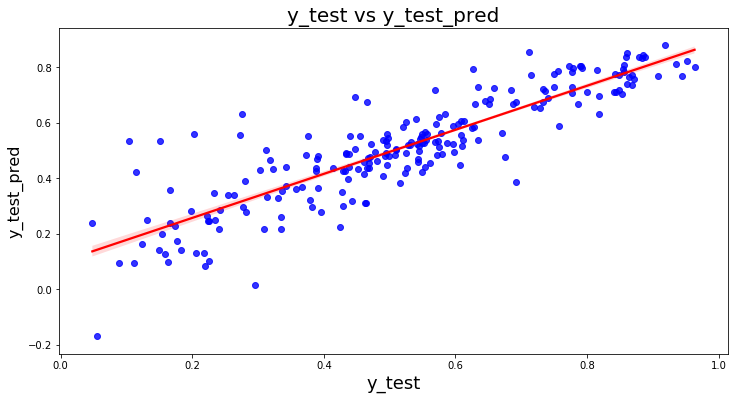

In [35]:
#Regression plot for best fitted line 
plt.figure(figsize=(12,6))
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

# We can see the demand for bikes depends mainly on below variables:

#### yr , holiday ,windspeed, season_summer, mnth_aug, mnth_Dec, mnth_Feb, mnth_Jan, mnth_Jul, mnth_Jun, mnth_Mar, mnth_May, mnth_Oct, mnth_Sep, weekday_Tues, weekday_Wed, weathet_Light_snow, weather_Mist.

##### Demands increases in the month of yr, season_Summer, mnth_Aug, mnth_Jul,  mnth_Jun, mnth_Mar, mnth_May, mnth_Oct, mnth_Sep.
##### Demand decreases if it is holiday , windspeed, mnth_Dec, mnth_Feb, mnth_Jan, weekday_Tues, weekday_Wed, weathet_Light_snow, weather_Mist.

# Final Result Comparison between Train model and Test:
- Train R^2 : 0.811
- Train Adjusted R^2 : 0.802
- Test R^2: 0.765
- Test Adjusted R^2: 0.789
- Difference in R^2 between train and test: 3%
- Difference in adjusted R^2 between Train and test: 1.2% which is less than 5%
- Yes! Its a best model